In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv("../../data/_data.csv")
print(df.columns.tolist())

['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление']


#Удаляем ненужные колонки

In [213]:
columns_to_drop = [
    "Unnamed: 0",
    "Телефоны",
    "Описание",
    "Название ЖК",
    "Ссылка на объявление",
    "Тип",
    "Площадь комнат, м2",
]

df = df.drop(columns=columns_to_drop)
df.to_csv("../../data/data.csv", index=False)
df = pd.read_csv("../../data/data.csv")

In [214]:
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [215]:
#Приводим к цифровому виду

In [216]:
df["Площадь, м2"] = (
    df["Площадь, м2"]
    .astype(str)
    .str.replace(",", ".")
    .str.split("/")
    .str[0]
    .astype(float)
)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [217]:
df["Цена"] = (
    df["Цена"].astype(str).str.replace(",", ".").str.split(".").str[0].astype(int)
)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [218]:
df["floor"] = df["Дом"].astype(str).str.split("/").str[0].astype(int)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5


In [219]:
df["house_type"] = df["Дом"].astype(str).str.split(",").str[-1].astype(str)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный


In [220]:
#Удаляем обработанную колонку

In [221]:
df.drop(columns=["Дом"], inplace=True)
df.head(5)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.2,Пасс (1),NaN,5,5/16
3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.2,Пасс (1),NaN,5,5/6
4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0,NaN,225000,Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.9,"Пасс (1), Груз (1)",Да,12,Панельный


In [222]:
df["house_type"] = df["house_type"].apply(
    lambda x: np.nan if x.replace("/", "").isdigit() else x
)

In [223]:
df.sample(20)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type
22136,270907856,"2, Изолированная",м. Шаболовская (10 мин пешком),"Москва, улица Шаболовка, 69/32",44.0,наземная,75000,Евроремонт,Лоджия (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,Пасс (1),Да,8,Кирпичный
11191,274654802,"3, Изолированная",м. Университет (2 мин пешком),"Москва, улица Строителей, 6К6",80.0,NaN,80000,Евроремонт,NaN,Во двор,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,Пасс (1),Да,2,Кирпичный
5241,274387769,1,м. Ховрино (16 мин пешком),"Москва, Зеленоградская улица, 17",40.0,NaN,34999,NaN,Лоджия (1),На улицу,Совмещенный (1),NaN,"Мебель в комнатах, Ванна, Стиральная машина, И...",П44,2.60,"Пасс (1), Груз (1)",NaN,12,Панельный
17115,272655642,1,м. Нижегородская (None мин пешком),"Москва, Нижегородская улица, 75А",30.0,открытая,30000,Евроремонт,Балкон (1),NaN,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,NaN,NaN,NaN,5,NaN
10844,238743190,1,м. Выхино (12 мин пешком),"Москва, Вешняковская улица, 18к1",40.0,подземная,50000,Дизайнерский,"Балкон (1), Лоджия (1)",На улицу и двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.00,"Пасс (1), Груз (1)",Да,4,Монолитный
17501,274490371,1,м. Алтуфьево (4 мин пешком),"Москва, Алтуфьевское шоссе, 89А",40.0,NaN,40000,Евроремонт,NaN,На улицу,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,2.64,Пасс (2),Да,2,Панельный
21087,274846798,1,м. Коньково (10 мин пешком),"Москва, улица Островитянова, 16К4",35.0,наземная,38000,Косметический,Балкон (1),NaN,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",II-57,2.64,Пасс (2),Да,12,Панельный
4738,272291391,3,м. Белорусская (3 мин пешком),"Москва, Большая Грузинская улица, 69",120.0,подземная,400000,Евроремонт,Лоджия (1),На улицу и двор,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,4.00,"Пасс (1), Груз (1)",Нет,9,Монолитно-кирпичный
19810,275005654,1,м. Проспект Просвещения (None мин пешком),"Санкт-Петербург, Суздальский проспект, 3К2, ш....",34.0,NaN,19000,Косметический,Балкон (1),NaN,Раздельный (1),NaN,Интернет,NaN,NaN,Пасс (1),NaN,9,NaN
3677,273224743,3,м. Минская (7 мин на машине),"Москва, Веерная улица, 22К1",90.0,наземная,85000,NaN,Балкон (1),NaN,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Ванна, Стиральная машина, К...",индивидуальный проект,NaN,NaN,NaN,17,Кирпичный


In [224]:
df["rooms"] = pd.to_numeric(df["Количество комнат"], errors="coerce")

In [225]:
df.sample()

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type,rooms
5403,207085491,"2, Смежная",м. Бульвар Рокоссовского (5 мин на машине),"Москва, Миллионная улица, 11К1",40.0,наземная,33000,Косметический,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,Пасс (1),Да,6,Кирпичный,NaN


In [226]:
#Обрабатываем выбросы высоты потолков

In [227]:
def to_meters(i):
    if i > 100:
        return i / 100
    elif i > 20:
        return i / 10
    else:
        return i


df["ceiling_high"] = df["Высота потолков, м"].apply(to_meters)

In [228]:
#Проверяем изменения

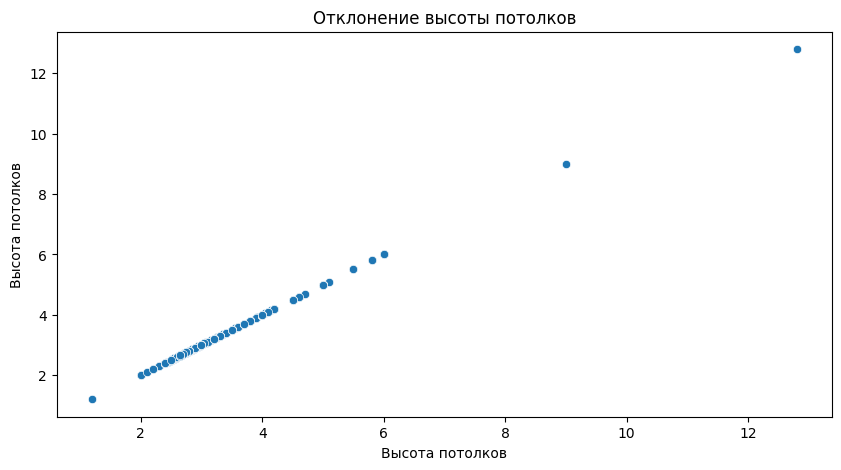

In [229]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="ceiling_high", y="ceiling_high", data=df)
plt.title("Отклонение высоты потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Высота потолков")
plt.show()

In [230]:
#Заполняем пробелы

In [231]:
num_cols = df.select_dtypes(include=[int, float]).columns.tolist()
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()

for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    if df[c].isna().any():
        df[c] = (
            df[c]
            .astype("object")
            .fillna("unknown")
            .astype("category" if str(df[c].dtype) == "category" else "object")
        )

In [232]:
#Проверяем количество пробелов

In [233]:
df.isna().sum()

ID  объявления              0
Количество комнат           0
Метро                       0
Адрес                       0
Площадь, м2                 0
Парковка                    0
Цена                        0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Дополнительно               0
Серия дома                  0
Высота потолков, м          0
Лифт                        0
Мусоропровод                0
floor                       0
house_type                  0
rooms                       0
ceiling_high                0
dtype: int64

In [234]:
df.head(1)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type,rooms,ceiling_high
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",unknown,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0


In [235]:
#Удаляем ненужные

In [236]:
columns_to_drop = [
    "Количество комнат",
    "Высота потолков, м",
    "Серия дома",
    "Дополнительно"
]

df = df.drop(columns=columns_to_drop)

In [237]:
df.head(1)

,ID объявления,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт,Мусоропровод,floor,house_type,rooms,ceiling_high
0,271271157,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0


In [238]:
#Переименовываем колонки

In [239]:
translation_dict = {
    'ID  объявления': 'id',
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'area_m2',
    'Парковка': 'parking',
    'Цена': 'price',
    'Ремонт': 'renovation',
    'Балкон': 'balcony',
    'Окна': 'windows',
    'Санузел': 'bathroom',
    'Можно с детьми/животными': 'kids_pets_allowed',
    'Лифт': 'elevator',
    'Мусоропровод': 'garbage_chute'
}
df.rename(columns=translation_dict, inplace=True)


In [240]:
df.head(1)

,id,metro,address,area_m2,parking,price,renovation,balcony,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high
0,271271157,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0


In [241]:
df['parking'] = df['parking'].replace(to_replace ='открытая', value = 'бесплатная во дворе', regex = True)
df['parking'] = df['parking'].replace(to_replace ='наземная', value = 'платная во дворе', regex = True)
df['parking'] = df['parking'].fillna('бесплатная во дворе')

In [242]:
print(df.head(10))

          id                         metro  \
0  271271157  м. Смоленская (9 мин пешком)   
1  271634126  м. Смоленская (8 мин пешком)   
2  271173086  м. Смоленская (7 мин пешком)   
3  272197456  м. Смоленская (3 мин пешком)   
4  273614615   м. Арбатская (7 мин пешком)   
5  274837728  м. Смоленская (5 мин пешком)   
6  273643908   м. Арбатская (4 мин пешком)   
7  274475342  м. Смоленская (3 мин пешком)   
8  273973191  м. Смоленская (9 мин пешком)   
9  272900409  м. Арбатская (10 мин пешком)   

                               address  area_m2              parking   price  \
0        Москва, улица Новый Арбат, 27    200.0            подземная  500000   
1        Москва, улица Новый Арбат, 27    198.0            подземная  500000   
2        Москва, улица Новый Арбат, 27    200.0            подземная  500000   
3     Москва, переулок Плотников, 21С1    170.0            подземная  400000   
4        Москва, улица Новый Арбат, 15     58.0              unknown  225000   
5  Москва, 1-

In [243]:
def safe_pick_lodzhia(text):
    parts = str(text).replace(',', ' ').split()  # схлопывает лишние пробелы/запятые
    if 'Лоджия' in parts:
        i = parts.index('Лоджия')
        if i+1 < len(parts):
            return re.sub(r'\D', '', parts[i+1]) or '0'
    return '0'

def safe_pick_balkon(text):
    parts = str(text).replace(',', ' ').split()
    if 'Балкон' in parts:
        i = parts.index('Балкон')
        if i+1 < len(parts):
            return re.sub(r'\D', '', parts[i+1]) or '0'
    return '0'

import re
s = df['balcony'].fillna('Балкон (0), Лоджия (0)')
df['lodjia'] = s.apply(safe_pick_lodzhia).astype(int)
df['balcony_'] = s.apply(safe_pick_balkon).astype(int)


In [244]:
print(df.head(10))

          id                         metro  \
0  271271157  м. Смоленская (9 мин пешком)   
1  271634126  м. Смоленская (8 мин пешком)   
2  271173086  м. Смоленская (7 мин пешком)   
3  272197456  м. Смоленская (3 мин пешком)   
4  273614615   м. Арбатская (7 мин пешком)   
5  274837728  м. Смоленская (5 мин пешком)   
6  273643908   м. Арбатская (4 мин пешком)   
7  274475342  м. Смоленская (3 мин пешком)   
8  273973191  м. Смоленская (9 мин пешком)   
9  272900409  м. Арбатская (10 мин пешком)   

                               address  area_m2              parking   price  \
0        Москва, улица Новый Арбат, 27    200.0            подземная  500000   
1        Москва, улица Новый Арбат, 27    198.0            подземная  500000   
2        Москва, улица Новый Арбат, 27    200.0            подземная  500000   
3     Москва, переулок Плотников, 21С1    170.0            подземная  400000   
4        Москва, улица Новый Арбат, 15     58.0              unknown  225000   
5  Москва, 1-

In [245]:
df["metro"] = df["metro"].astype(str).str.split(" ").str[1].astype(str)

In [246]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,balcony,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,unknown,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1),unknown,5,unknown,1.0,3.2,0,0
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1),unknown,5,unknown,1.0,3.2,0,0
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,unknown,На улицу и двор,Совмещенный (2),unknown,"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0


In [247]:
df['price_for_sqr_meter'] = round(df['price']/ df['area_m2'], 2)

In [248]:
# Вместо отдельного txt файла и импорта:)

VAO = [
    'Авиамоторная',
    'Андроновка',
    'Белокаменная',
    'Бульвар Рокоссовского',
    'Измайлово',
    'Измайловская',
    'Локомотив',
    'Лухмановская',
    'Новогиреево',
    'Новокосино',
    'Партизанская',
    'Первомайская',
    'Перово',
    'Преображенская площадь',
    'Семеновская',
    'Соколиная Гора',
    'Сокольники',
    'Улица Дмитриевского',
    'Черкизовская',
    'Шоссе Энтузиастов',
    'Щелковская',
    'Электрозаводская',
    'Стромынка',
]

ZAO = [
    'Багратионовская',
    'Боровское шоссе',
    'Киевская',
    'Кропоткинская',
    'Крылатское',
    'Кунцевская',
    'Кутузовская',
    'Ломоносовский проспект',
    'Минская',
    'Мичуринский проспект',
    'Молодежная',
    'Новопеределкино',
    'Озёрная',
    'Озерная',
    'Парк Победы',
    'Пионерская',
    'Проспект Вернадского',
    'Рабочий Посёлок',
    'Рабочий поселок',
    'Рабочий посёлок',
    'Рабочий Поселок',
    'Раменки',
    'Сетунь',
    'Славянский бульвар',
    'Славянский бульвар',
    'Солнцево',
    'Студенческая',
    'Тропарёво',
    'Тропарево',
    'Филевский парк',
    'Фили',
    'Фили',
    'Юго-Западная',
    'Аминьевское шоссе',
    'Давыдково',
    'Дорогомиловская',
    'Кунцевская',
    'Проспект Вернадского',
    'Улица Новаторов',
]

NAO = [
    'Говорово',
    'Коммунарка',
    'Ольховая',
    'Остафьево',
    'Прокшино',
    'Рассказовка',
    'Румянцево',
    'Саларьево',
    'Филатов Луг',
    'Щербинка',
]

SAO = [
    'Аэропорт',
    'Балтийская',
    'Беговая',
    'Беломорская',
    'Бескудниково',
    'Верхние Лихоборы',
    'Водный стадион',
    'Войковская',
    'Гражданская',
    'Дегунино',
    'Динамо',
    'Дмитровская',
    'Зорге',
    'Коптево',
    'Красный Балтиец',
    'Лихоборы',
    'Марк',
    'Окружная',
    'Панфиловская',
    'Петровский парк',
    'Петровский Парк',
    'Петровско-Разумовская',
    'Покровское-Стрешнево',
    'Полежаевская',
    'Речной вокзал',
    'Савеловская',
    'Сокол',
    'Стрешнево',
    'Тимирязевская',
    'Ховрино',
    'Хорошёво',
    'Хорошево',
    'Хорошёвская',
    'Хорошевская',
    'ЦСКА',
    'Беломорская улица',
    'Петровский парк',
    'Петровско-Разумовская',
]

SVAO = [
    'Алексеевская',
    'Алтуфьево',
    'Бабушкинская',
    'Бибирево',
    'Ботанический сад',
    'Бутырская',
    'ВДНХ',
    'Владыкино',
    'Выставочный центр',
    'Лианозово',
    'Марьина роща',
    'Медведково',
    'Окружная',
    'Отрадное',
    'Ростокино',
    'Савеловская',
    'Свиблово',
    'Телецентр',
    'Улица Академика Королёва',
    'Улица академика королева',
    'Улица Академика королева',
    'Улица академика Королева',
    'Улица академика королёва',
    'Улица Академика королёва',
    'Улица академика Королёва',
    'Улица Милашенкова',
    'Улица Сергея Эйзенштейна',
    'Фонвизинская',
    'Бутырская',
    'Фонвизинская',
    'Шереметьевская',
]

SZAO = [
    'Волоколамская',
    'Митино',
    'Мнёвники',
    'Народное Ополчение',
    'Народное ополчение',
    'Октябрьское поле',
    'Пенягино',
    'Планерная',
    'Пятницкое шоссе',
    'Спартак',
    'Строгино',
    'Сходненская',
    'Трикотажная',
    'Тушинская',
    'Щукинская',
    'Нижние Мневники',
    'Терехово',
    'Улица Народного ополчения',
]

CAO = [
    'Александровский сад',
    'Арбатская',
    'Баррикадная',
    'Бауманская',
    'Беговая',
    'Белорусская',
    'Библиотека имени Ленина',
    'Боровицкая',
    'Воробьевы горы',
    'Выставочная',
    'Деловой центр',
    'Добрынинская',
    'Достоевская',
    'Каланчёвская',
    'Китай-город',
    'Комсомольская',
    'Краснопресненская',
    'Красносельская',
    'Красные ворота',
    'Крестьянская застава',
    'Кузнецкий мост',
    'Курская',
    'Лубянка',
    'Лужники',
    'Марксистская',
    'Маяковская',
    'Международная',
    'Менделеевская',
    'Новокузнецкая',
    'Новослободская',
    'Октябрьская',
    'Охотный ряд',
    'Павелецкая',
    'Парк Культуры',
    'Площадь Ильича',
    'Площадь Революции',
    'Полянка',
    'Пролетарская',
    'Проспект Мира',
    'Пушкинская',
    'Рижская',
    'Римская',
    'Серпуховская',
    'Смоленская',
    'Смоленская',
    'Спортивная',
    'Сретенский бульвар',
    'Сухаревская',
    'Таганская',
    'Тверская',
    'Театральная',
    'Тестовская',
    'Третьяковская',
    'Трубная',
    'Тургеневская',
    'Улицаа 1905 года',
    'Фрунзенская',
    'Цветной бульвар',
    'Чеховская',
    'Чистые пруды',
    'Чкаловская',
    'Шелепиха',
    'Электрозаводская',
    'Волхонка',
    'Плющиха',
    'Ржевская',
    'Рубцовская',
]

UVAO = [
    'Авиамоторная',
    'Братиславская',
    'Волгоградский проспект',
    'Волжская',
    'Выхино',
    'Депо',
    'Дубровка',
    'Жулебино',
    'Калитники',
    'Кожуховская',
    'Косино',
    'Котельники',
    'Кубанская',
    'Кузьминки',
    'Курьяново',
    'Лермонтовский проспект',
    'Лефортово',
    'Люблино',
    'Марьино',
    'Москва-Товарная',
    'Некрасовка',
    'Нижегородская',
    'Новохохловская',
    'Новохохловская',
    'Окская',
    'Перерва',
    'Печатники',
    'Рязанский проспект',
    'Стахановская',
    'Текстильщики',
    'Текстильщики',
    'Угрешская',
    'Юго-Восточная',
    'Печатники',
    'Текстильщики',
]

UZAO = [
    'Академическая',
    'Беляево',
    'Битцевский парк',
    'Бульвар адмирала Ушакова',
    'Бульвар Адмирала ушакова',
    'Бульвар адмирала ушакова',
    'Бульвар Дмитрия Донского',
    'Бунинская Аллея',
    'Бунинская аллея',
    'Бутово',
    'Калужская',
    'Каховская',
    'Коньково',
    'Нахимовский Проспект',
    'Нахимовский проспект',
    'Новоясеневская',
    'Новые Черёмушки',
    'Новые Черемушки',
    'Новые черёмушки',
    'Площадь Гагарина',
    'Профсоюзная',
    'Севастопольская',
    'Зюзино',
    'Теплый стан',
    'Теплый Стан',
    'Улица Горчакова',
    'Улица Скобелевская',
    'Улица Старокачаловская',
    'Университет',
    'Ясенево',
    'Воронцовская',
    'Каховская',
    'Севастопольский проспект',
]

UAO = [
    'Автозаводская',
    'Автозаводская',
    'Алма-Атинская',
    'Аннино',
    'Борисово',
    'Варшавская',
    'Верхние Котлы',
    'Домодедовская',
    'ЗИЛ',
    'Зябликово',
    'Кантемировская',
    'Каширская',
    'Коломенская',
    'Красногвардейская',
    'Красный Строитель',
    'Крымская',
    'Ленинский проспект',
    'Лесопарковая',
    'Москворечье',
    'Нагатинская',
    'Нагорная',
    'Орехово',
    'Покровское',
    'Пражская',
    'Технопарк',
    'Тульская',
    'Улица академика Янгеля',
    'Царицыно',
    'Царицыно',
    'Чертановская',
    'Шаболовская',
    'Шипиловская',
    'Южная',
    'Каширская',
    'Кленовый бульвар',
]
RAYONI = [
    'Аникеевка',
    'Баковка',
    'Битца',
    'Водники',
    'Долгопрудная',
    'Красногорская',
    'Лобня',
    'Мякинино',
    'мякинино',
    'Нахабино',
    'Немчиновка',
    'Новодачная',
    'Одинцово',
    'Опалиха',
    'Павшино',
    'Подольск',
    'Силикатная',
    'Сколково',
    'Хлебниково',
    'Шереметьевская',
]

In [249]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,balcony,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0,2500.00
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,unknown,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0,2525.25
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2500.00
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2352.94
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,unknown,На улицу и двор,Совмещенный (2),unknown,"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0,3879.31


In [250]:
# Создание доп. параметр "Административный округ" путём elifов (на работе так делать не будем)
def district(text5):
    res = ''
    if text5 in VAO:
        res = 'ВАО'
    elif text5 in ZAO:
        res = 'ЗАО'
    elif text5 in NAO:
        res = 'НАО'
    elif text5 in SAO:
        res = 'САО'
    elif text5 in SVAO:
        res = 'СВАО'
    elif text5 in SZAO:
        res = 'СЗАО'
    elif text5 in CAO:
        res = 'ЦАО'
    elif text5 in UVAO:
        res = 'ЮВАО'
    elif text5 in UAO:
        res = 'ЮАО'
    elif text5 in UZAO:
        res = 'ЮЗАО'
    elif text5 in RAYONI:
        res = 'Районы'
    return res

In [251]:
text5 = df['metro']
text5 = text5.apply(district)
df['area'] = text5

In [252]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,balcony,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0,2500.00,ЦАО
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,unknown,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0,2525.25,ЦАО
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2500.00,ЦАО
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,unknown,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2352.94,ЦАО
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,unknown,На улицу и двор,Совмещенный (2),unknown,"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0,3879.31,ЦАО


In [253]:
df.drop(columns='balcony', inplace=True)

In [254]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0,2500.00,ЦАО
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0,2525.25,ЦАО
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2500.00,ЦАО
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2352.94,ЦАО
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,На улицу и двор,Совмещенный (2),unknown,"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0,3879.31,ЦАО


In [255]:
win = df["windows"].astype(str).str.lower()

df["windows_to_street"] = np.where(
    win == "unknown", 0, win.str.contains(r"на\s*улиц|улиц[уые]", regex=True)
).astype("int8")

df["windows_to_yard"] = np.where(
    win == "unknown", 0, win.str.contains(r"двор", regex=True)
).astype("int8")

df["windows_aspects"] = (df["windows_to_street"] + df["windows_to_yard"]).astype("int8")


df.drop(columns=['windows'], inplace=True)

In [256]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area,windows_to_street,windows_to_yard,windows_aspects
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0,2500.00,ЦАО,0,0,0
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0,2525.25,ЦАО,1,1,2
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,Совмещенный (3),Можно с детьми,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2500.00,ЦАО,1,1,2
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,Совмещенный (3),Можно с животными,Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2352.94,ЦАО,1,1,2
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,Совмещенный (2),unknown,"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0,3879.31,ЦАО,1,1,2


In [257]:
kp = df['kids_pets_allowed'].astype(str).str.lower().str.strip()

df['allow_kids'] = kp.str.contains('можно с детьми').astype('int8')
df['allow_pets'] = kp.str.contains('можно с животными').astype('int8')

df['kids_pets_aspects'] = (df['allow_kids'] + df['allow_pets']).astype('int8')

df.drop(columns=['kids_pets_allowed'], inplace=True)

In [258]:
df.head()

,id,metro,address,area_m2,parking,price,renovation,bathroom,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area,windows_to_street,windows_to_yard,windows_aspects,allow_kids,allow_pets,kids_pets_aspects
0,271271157,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,"Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0,0,0,2500.00,ЦАО,0,0,0,1,1,2
1,271634126,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,"Совмещенный (2), Раздельный (1)","Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный,4.0,3.5,0,0,2525.25,ЦАО,1,1,2,1,0,1
2,271173086,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,Совмещенный (3),Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2500.00,ЦАО,1,1,2,1,0,1
3,272197456,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,Совмещенный (3),Пасс (1),unknown,5,unknown,1.0,3.2,0,0,2352.94,ЦАО,1,1,2,0,1,1
4,273614615,Арбатская,"Москва, улица Новый Арбат, 15",58.0,unknown,225000,Евроремонт,Совмещенный (2),"Пасс (1), Груз (1)",Да,12,Панельный,2.0,3.9,0,0,3879.31,ЦАО,1,1,2,0,0,0


In [259]:
df.to_csv('../realise 2.0/data_clean.csv')

In [260]:
df.to_csv('../realises 3.0/team_3_data.csv')

In [261]:
df_1 = pd.read_csv('../realises 3.0/team_3_data.csv')

cat_cols = df_1.select_dtypes(include=['object','string','category']).columns

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_1[cat_cols] = oe.fit_transform(df_1[cat_cols]).astype('int32')

enc_meta = {c: list(cats) for c, cats in zip(cat_cols, oe.categories_)}

/var/folders/cq/d0mll6250t37dlr3m8m4jm7r0000gn/T/ipykernel_12802/1051139795.py:6: RuntimeWarning: invalid value encountered in cast
  df_1[cat_cols] = oe.fit_transform(df_1[cat_cols]).astype('int32')


In [262]:
df_1.head()

,Unnamed: 0,id,metro,address,area_m2,parking,price,renovation,bathroom,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area,windows_to_street,windows_to_yard,windows_aspects,allow_kids,allow_pets,kids_pets_aspects
0,0,271271157,239,9962,200.0,5,500000,2,0,23,1,5,5,4.0,3.0,0,0,2500.00,7,0,0,0,1,1,2
1,1,271634126,239,9962,198.0,5,500000,2,10,8,2,5,4,4.0,3.5,0,0,2525.25,7,1,1,2,1,0,1
2,2,271173086,239,9962,200.0,5,500000,3,14,7,0,5,10,1.0,3.2,0,0,2500.00,7,1,1,2,1,0,1
3,3,272197456,239,7598,170.0,5,400000,3,14,7,0,5,10,1.0,3.2,0,0,2352.94,7,1,1,2,0,1,1
4,4,273614615,12,9959,58.0,0,225000,3,9,8,1,12,6,2.0,3.9,0,0,3879.31,7,1,1,2,0,0,0


In [263]:
pd.set_option('display.max_columns', None)
df_1.head()

,Unnamed: 0,id,metro,address,area_m2,parking,price,renovation,bathroom,elevator,garbage_chute,floor,house_type,rooms,ceiling_high,lodjia,balcony_,price_for_sqr_meter,area,windows_to_street,windows_to_yard,windows_aspects,allow_kids,allow_pets,kids_pets_aspects
0,0,271271157,239,9962,200.0,5,500000,2,0,23,1,5,5,4.0,3.0,0,0,2500.00,7,0,0,0,1,1,2
1,1,271634126,239,9962,198.0,5,500000,2,10,8,2,5,4,4.0,3.5,0,0,2525.25,7,1,1,2,1,0,1
2,2,271173086,239,9962,200.0,5,500000,3,14,7,0,5,10,1.0,3.2,0,0,2500.00,7,1,1,2,1,0,1
3,3,272197456,239,7598,170.0,5,400000,3,14,7,0,5,10,1.0,3.2,0,0,2352.94,7,1,1,2,0,1,1
4,4,273614615,12,9959,58.0,0,225000,3,9,8,1,12,6,2.0,3.9,0,0,3879.31,7,1,1,2,0,0,0


In [264]:
df_1.to_csv('../realises 3.0/team_3_data.csv')